## How tall is A?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
# multiplies prbabilities from two distributions
def make_joint(pmf1, pmf2):
    """Compute the outer product of two Pmfs."""
    X, Y = np.meshgrid(pmf1['probs'], pmf2['probs'])
    return pd.DataFrame(X * Y, columns=pmf1.index, index=pmf2.index)

# normal prior
p_dist = pd.DataFrame(index = np.linspace(140,220,161))
p_dist['probs'] = [norm.pdf(x, 178, 7.7) for x in p_dist.index]
p_dist['probs'] = p_dist['probs']/sum(p_dist['probs'])

# joint prior
joint = make_joint(p_dist, p_dist)

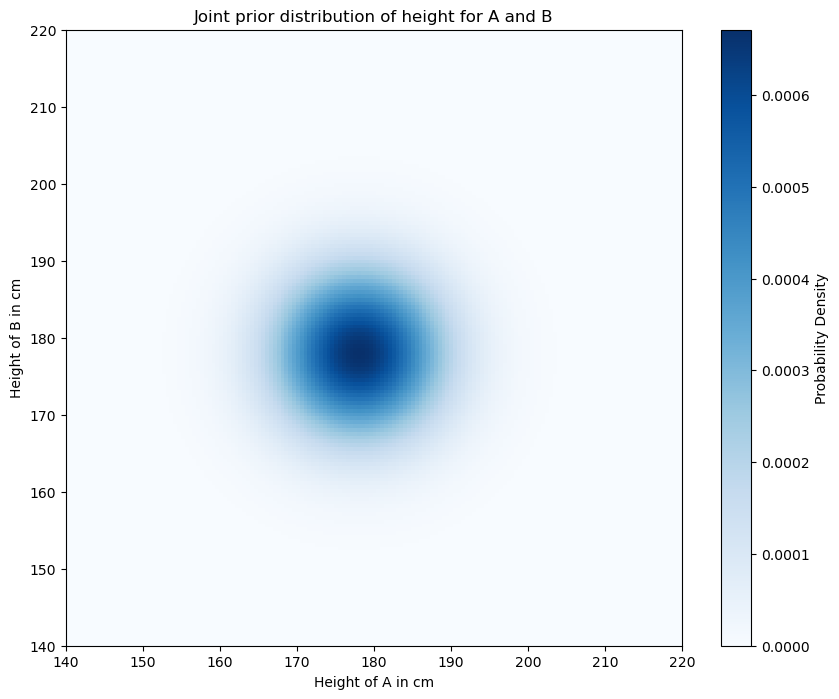

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(joint, 
          extent=[140, 220, 140, 220],
          origin='lower',
          cmap='Blues',
          aspect='equal')

# Add colorbar
plt.colorbar(label='Probability Density')

# Labels and title
plt.xlabel('Height of A in cm')
plt.ylabel('Height of B in cm')
plt.title('Joint prior distribution of height for A and B')

plt.show()

In [8]:
# create a grid of heights of A and heights of B
A, B = np.meshgrid(joint.columns, joint.index)

# check if A is taller (and add 0 to make it numeric)
A_taller = (A > B)+0
likelihood = pd.DataFrame(A_taller, index=joint.columns, columns=joint.index)

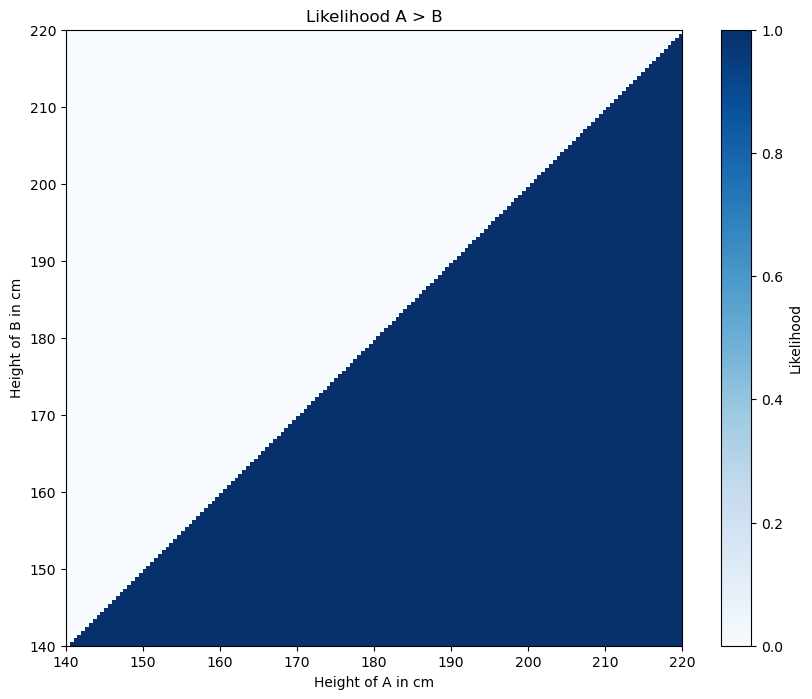

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(likelihood, 
          extent=[140, 220, 140, 220],
          origin='lower',
          cmap='Blues',
          aspect='equal')

plt.colorbar(label='Likelihood')
plt.xlabel('Height of A in cm')
plt.ylabel('Height of B in cm')
plt.title('Likelihood A > B')
plt.show()

In [10]:
posterior = joint * likelihood
prob_data = posterior.to_numpy().sum()
posterior = posterior / prob_data

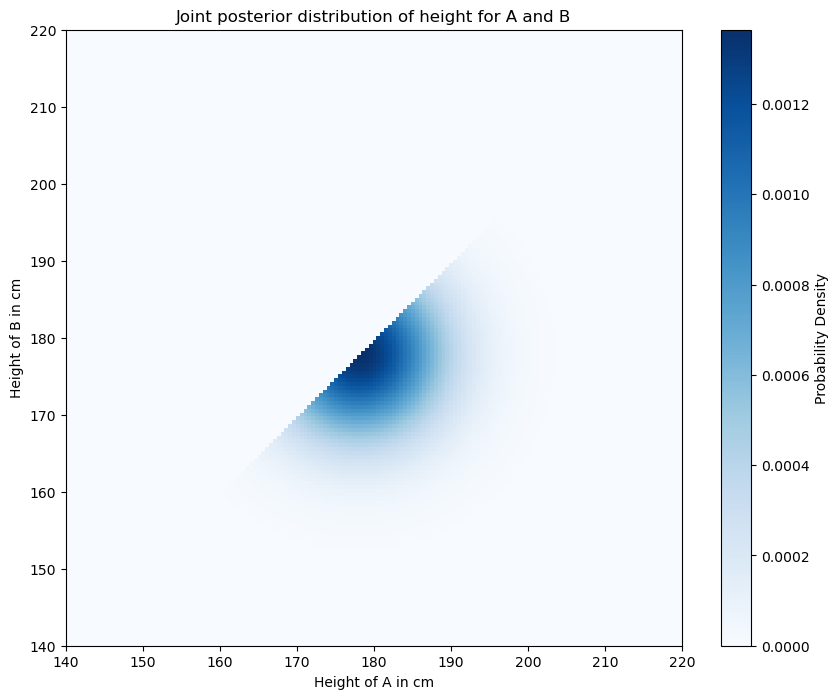

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(posterior, 
          extent=[140, 220, 140, 220],
          origin='lower',
          cmap='Blues',
          aspect='equal')

plt.colorbar(label='Probability Density')
plt.xlabel('Height of A in cm')
plt.ylabel('Height of B in cm')
plt.title('Joint posterior distribution of height for A and B')
plt.show()

In [12]:
# sum over the rows of the joint posterior
marginal_A = posterior.sum(axis=0)

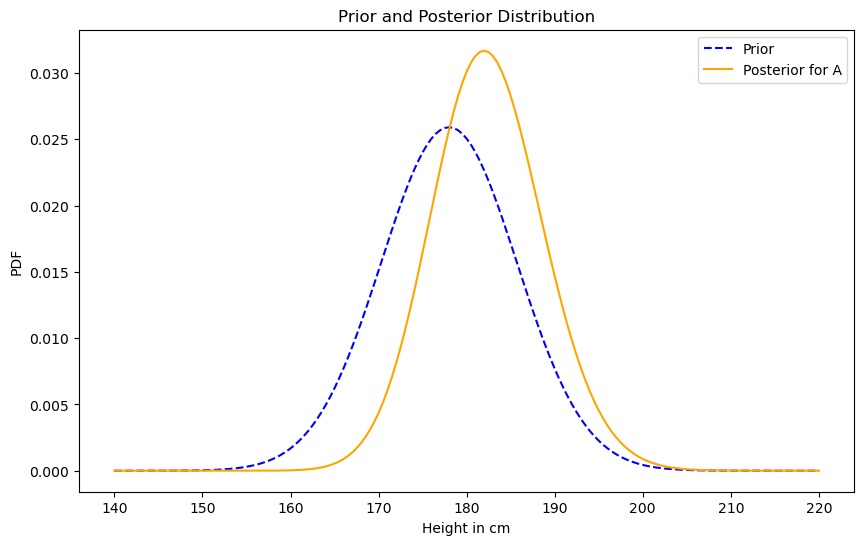

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(p_dist.index, p_dist['probs'], '--', label='Prior', color='blue')
plt.plot(posterior.columns, marginal_A, '-', label='Posterior for A', color='orange')

plt.xlabel('Height in cm')
plt.ylabel('PDF')
plt.title('Prior and Posterior Distribution')
plt.legend()
plt.show()

In [14]:
sum(marginal_A.index*marginal_A)

182.42454600578677

In [16]:
column_170 = posterior[170]

In [17]:
column_170 = column_170/sum(column_170)

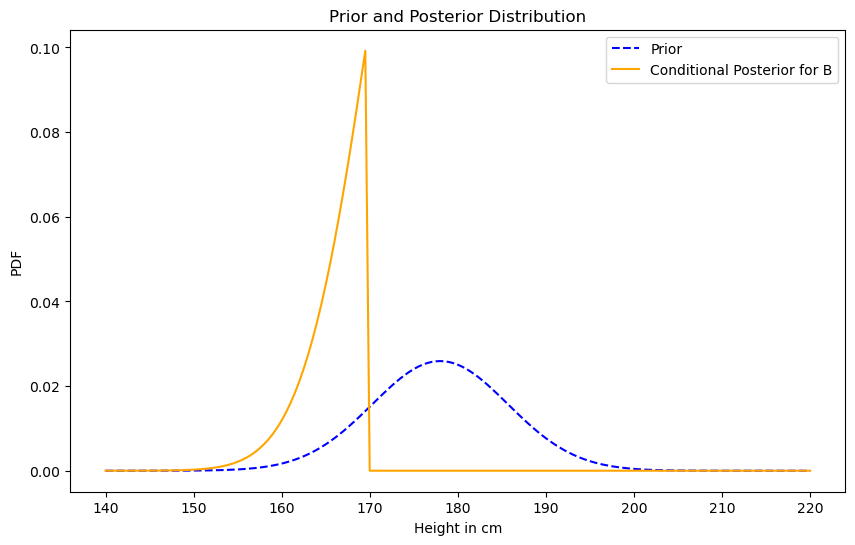

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(p_dist.index, p_dist['probs'], '--', label='Prior', color='blue')
plt.plot(posterior.index, column_170, '-', 
         label='Conditional Posterior for B', color='orange')

plt.xlabel('Height in cm')
plt.ylabel('PDF')
plt.title('Prior and Posterior Distribution')
plt.legend()
plt.show()